In [42]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/naomiverkerk/TM10007.git


## Import data

In [43]:
## Import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import svm
from sklearn import decomposition
import statistics
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")
from time import time

# Preprocessing
from load_data import load_data
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, LabelEncoder

# Classifiers and kernels
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer, make_column_selector as selector


## Loading Data

In [44]:
##Loading Data
data = load_data()
X = data
X = X.replace(np.inf, np.nan)
Y = data['label']
del X['label']

# Label counter

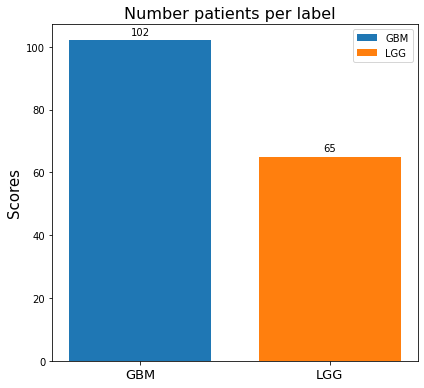

In [45]:
label_count = Y.value_counts()
z = np.arange(len(label_count.index))
width = 0.75
fig, ax = plt.subplots(figsize = (6,5.5))
count1 = ax.bar(0.5, label_count.values[0], width, label=label_count.index[0])
count2 = ax.bar(1.5, label_count.values[1], width, label=label_count.index[1])

ax.set_ylabel('Scores', fontsize = 15)
ax.set_title('Number patients per label  ', fontsize = 16)
ax.set_xticks([0.5,1.5], list(label_count.index), fontsize = 13)
ax.legend()
ax.bar_label(count1, padding=3)
ax.bar_label(count2, padding=3)
ax.grid(False)
fig.tight_layout()

plt.show()

## Splitting into test and train(design)

In [46]:
## Split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2, random_state = 4, stratify = Y)

In [47]:
def scatterplot_distribution1(X1,X2,Y1,Y2,Y=Y,data=data):
    encoder = LabelEncoder()
    Y = encoder.fit_transform(Y)
    Y1= encoder.transform(Y1)
    Y2= encoder.transform(Y2)     
    
    colour = sns.color_palette("Set2")
    color1=colour[0]
    color2=colour[1]
    colormap = np.array([color1,color2])

    fig = plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(131)
    ax1.set_title(f"Brats, entire dataset = {len(data)}", fontsize=13)
    ax1.scatter(data.iloc[:,0], data.iloc[:,1], marker='o', c=colormap[Y],
            s=45, edgecolor='k', cmap=plt.cm.Paired)
    
    ax2 = fig.add_subplot(132, sharex = ax1, sharey = ax1)
    ax2.set_title(f"X_train = {len(X_train)}", fontsize=13)
    ax2.scatter(X1.iloc[:,0], X1.iloc[:,1], marker='o', c=colormap[Y1],
            s=45, edgecolor='k', cmap=plt.cm.Paired)

    ax3 = fig.add_subplot(133, sharex = ax1, sharey = ax1)
    ax3.set_title(f"X_test = {len(X_test)}", fontsize=13)
    ax3.scatter(X2.iloc[:,0], X2.iloc[:,1], marker='o', c=colormap[Y2],
            s=45, edgecolor='k', cmap=plt.cm.Paired)   

    GBM_patch = mpatches.Patch(color=colour[0], label='GBM')
    LGG_patch = mpatches.Patch(color=colour[1], label='LGG')
    fig.legend(handles=[GBM_patch, LGG_patch],loc="center right", prop={'size': 12})
    fig.subplots_adjust(top = 0.85, right=0.93)
    fig.suptitle("Brats entire dataset", fontsize = 18)

    plt.show()

def scatterplot_distribution2(X1,X2,Y1,Y2,Y=Y,data=data):
    encoder = LabelEncoder()
    Y = encoder.fit_transform(Y)
    Y1= encoder.transform(Y1)
    Y2= encoder.transform(Y2)     
    
    colour = sns.color_palette("Set2")
    color1=colour[0]
    color2=colour[1]
    colormap = np.array([color1,color2])

    fig = plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(131)
    ax1.set_title(f"Brats, entire dataset = {len(data)}", fontsize=13)
    ax1.scatter(data.iloc[:,0], data.iloc[:,1], marker='o', c=colormap[Y],
            s=45, edgecolor='k', cmap=plt.cm.Paired)
    
    ax2 = fig.add_subplot(132)
    ax2.set_title(f"X_train = {len(X_train)}", fontsize=13)
    ax2.scatter(X1[:,0], X1[:,1], marker='o', c=colormap[Y1],
            s=45, edgecolor='k', cmap=plt.cm.Paired)

    ax3 = fig.add_subplot(133, sharex = ax2, sharey = ax2)
    ax3.set_title(f"X_test = {len(X_test)}", fontsize=13)
    ax3.scatter(X2[:,0], X2[:,1], marker='o', c=colormap[Y2],
            s=45, edgecolor='k', cmap=plt.cm.Paired)   

    GBM_patch = mpatches.Patch(color=colour[0], label='GBM')
    LGG_patch = mpatches.Patch(color=colour[1], label='LGG')
    fig.legend(handles=[GBM_patch, LGG_patch],loc="center right", prop={'size': 12})
    fig.subplots_adjust(top = 0.85, right=0.93)
    fig.suptitle("Brats entire dataset scaled", fontsize = 18)

    plt.show()

def scatterplot_distribution3(X1,X2,Y1,Y2,Y=Y,data=data):
    encoder = LabelEncoder()
    Y = encoder.fit_transform(Y)

    colour = sns.color_palette("Set2")
    color1=colour[0]
    color2=colour[1]
    colormap = np.array([color1,color2])

    fig = plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(131)
    ax1.set_title(f"Brats, entire dataset = {len(data)}", fontsize=13)
    ax1.scatter(data.iloc[:,0], data.iloc[:,1], marker='o', c=colormap[Y],
            s=45, edgecolor='k', cmap=plt.cm.Paired)
    
    ax2 = fig.add_subplot(132)
    ax2.set_title(f"X_train = {len(X_train)}", fontsize=13)
    ax2.scatter(X1[:,0], X1[:,1], marker='o', c=colormap[Y1],
            s=45, edgecolor='k', cmap=plt.cm.Paired)

    ax3 = fig.add_subplot(133, sharex = ax2, sharey = ax2)
    ax3.set_title(f"X_test = {len(X_test)}", fontsize=13)
    ax3.scatter(X2[:,0], X2[:,1], marker='o', c=colormap[Y2],
            s=45, edgecolor='k', cmap=plt.cm.Paired)   

    GBM_patch = mpatches.Patch(color=colour[0], label='GBM')
    LGG_patch = mpatches.Patch(color=colour[1], label='LGG')
    fig.legend(handles=[GBM_patch, LGG_patch],loc="center right", prop={'size': 12})
    fig.subplots_adjust(top = 0.85, right=0.93)
    fig.suptitle("Brats entire dataset after PCA", fontsize = 18)

    plt.show()

def results_plot(results,k):
    #Create results dataframe and plot it
    results = pd.DataFrame(results)
    fig,axes = plt.subplots(1,2, figsize = (10,5))
    fig.suptitle(f'{clf_list[k]}')
    sns.boxplot(y='auc', x='set', data=results,ax=axes[0]).set_title('AUC')
    sns.boxplot(y='accuracy', x='set', data=results, ax=axes[1]).set_title('Accuracy')

    optimal_parameter = []
    parameter_keys = list(parameters.keys())

    for item in parameter_keys:
        best_item = [] 
        for i in list(range(0,10,2)):
            best_item.append(results[item][i])
        
        optimal_parameter.append(statistics.median(best_item))
        print(f"The optimal {item} = {optimal_parameter[-1]}")

    acc_train = round(results['accuracy'][results['set']=='train'].mean(),3)*100
    acc_val = round(results['accuracy'][results['set']=='validation'].mean(),3)*100
    auc_train = round(results['auc'][results['set']=='train'].mean(),3)
    auc_val = round(results['auc'][results['set']=='validation'].mean(),3)

    results_mean.append({
        'Accuracy of train [%]':acc_train,
        'Accuracy of validation [%]':acc_val,
        'AUC of train':auc_train,
        'AUC of validation':auc_val,
        })

    print(f"Mean accuracy: train = {round(results_mean[k]['Accuracy of train [%]'],1)}%, validation = {round(results_mean[k]['Accuracy of validation [%]'],1)}% ")
    print(f"Mean AUC: train = {results_mean[k]['AUC of train']}, validation = {results_mean[k]['AUC of validation']} ")     
        
    return results          

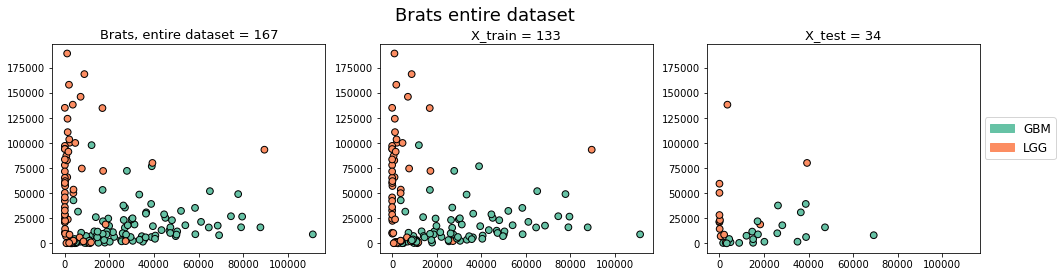

In [48]:
scatterplot_distribution1(X_train, X_test, Y_train, Y_test)

## Features removal

In [49]:
## Features weghalen met teveel missing values
acceptabele_ratio = 0.5
train_size = len(X_train.index)
removal_rate = round(train_size*acceptabele_ratio)

X_train = X_train.dropna(axis=1, thresh=removal_rate)


test_size = len(X_test.index)
removal_rate = round(test_size*acceptabele_ratio)
X_test = X_test.dropna(axis=1, thresh=removal_rate)
print(X_train.shape)
print(X_test.shape)


(133, 704)
(34, 704)


## Imputation with KNN

In [50]:
imputer = KNNImputer()
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# np.isnan(X_train_imputer).sum()
# np.isnan(X_test_imputer).sum()

## Scaling

In [51]:
## Scaling
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


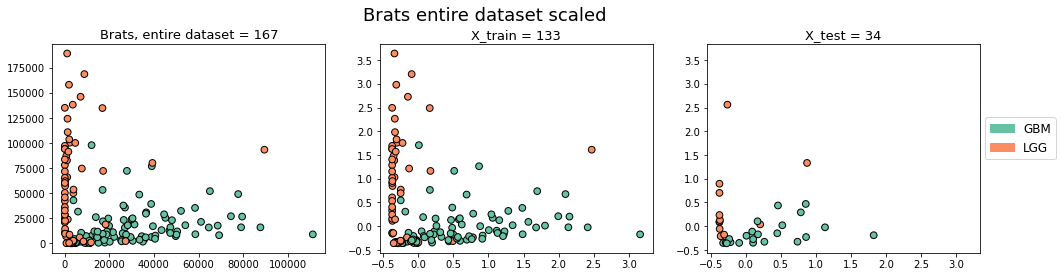

In [52]:
scatterplot_distribution2(X_train, X_test, Y_train, Y_test,Y=Y,data=data)

## Label encoder for scaling Y

In [53]:
## scaling van y
scaler = LabelEncoder()
scaler.fit(Y_train)
Y_train = scaler.transform(Y_train)
Y_test = scaler.transform(Y_test)

## PCA

In [54]:
## PCA
pca = decomposition.PCA(n_components=0.99, svd_solver= 'full')
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance)


[0.94938451 0.9824626  0.98936905 0.99161961]


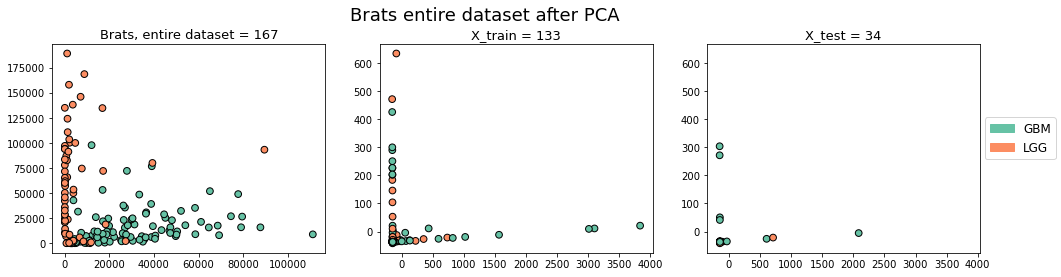

In [55]:
scatterplot_distribution3(X_train, X_test, Y_train, Y_test,Y=Y,data=data)

## Parameters

In [56]:
results_mean = []
cv_10fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
cv_5fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

clf_list = [KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(), SVC(probability=True)]

parameters_list = [
        {
                "n_neighbors": range(1,20,1),
                "weights": ["uniform", "distance"],
                "metric": ["euclidean","manhattan","chebyshev","minkowski"]
        },
        {
                "criterion": ['gini', 'entropy'],
                "min_samples_split": list(range(2,40,1)),
                "max_features": [1,2,3,4],
                "min_samples_leaf": list(range(1,20,1)),
        },
        {
                'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                'penalty' :["l1", 'l2', 'elasticnet', 'none'],
                "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        },
        {
                "n_estimators" : range(20,100,1),
                "criterion": ['gini', 'entropy'],
                "min_samples_split": list(range(2,40,1)),
                "max_features": [1,2,3,4],
                "min_samples_leaf": list(range(1,20,1)),
        },
        {
                'degree': [1, 3, 5],
                'coef0': [0.01, 0.5, 1],
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'kernel': ['poly', 'rbf', 'sigmoid']
        },
]


# KNN

K-nn classifier takes 0.63 seconds
The optimal n_neighbors = 12
The optimal weights = uniform
The optimal metric = chebyshev
Mean accuracy: train = 84.3%, validation = 68.4% 
Mean AUC: train = 0.891, validation = 0.693 


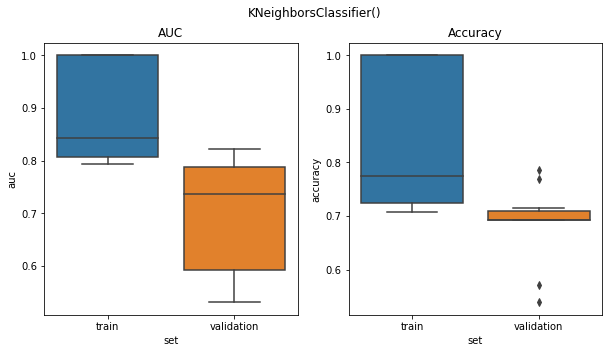

In [57]:
start = time()
results = []
for train_index, validation_index, in cv_10fold.split(X_train, Y_train):
    
    X_train_CV = X_train[train_index]
    Y_train_CV = Y_train[train_index]

    X_validation_CV = X_train[validation_index]
    Y_validation_CV = Y_train[validation_index]
    
    clf = clf_list[0]
    parameters = parameters_list[0]
    randomized_search = RandomizedSearchCV(clf, parameters, cv=cv_5fold, scoring='accuracy', n_iter = 10)
    randomized_search.fit(X_train_CV, Y_train_CV)

    # Get resulting classifier
    clf = randomized_search.best_estimator_

    # Test the classifier on the train data
    accuracy = clf.score(X_train_CV,Y_train_CV)
    probabilities = clf.predict_proba(X_train_CV)
    scores = probabilities[:, 1]
    auc = metrics.roc_auc_score(Y_train_CV, scores)

    results.append({
        'auc': auc,
        'accuracy':accuracy,
        'n_neighbors': clf.n_neighbors,
        "weights": clf.weights,
        "metric": clf.metric,
        'set': 'train'
    })
    
    # Test the classifier on the validation data
    accuracy_validation = clf.score(X_validation_CV,Y_validation_CV)
    probabilities_validation = clf.predict_proba(X_validation_CV)
    scores_validation = probabilities_validation[:, 1]
    auc_validation = metrics.roc_auc_score(Y_validation_CV, scores_validation)
    
    results.append({
        'auc': auc_validation,
        'accuracy':accuracy_validation,
        'n_neighbors': clf.n_neighbors,
        "weights": clf.weights,
        "metric": clf.metric,
        'set': 'validation'
    })

z = round((time() - start),2)
print(f"K-nn classifier takes {z} seconds")
results_knn = results_plot(results,0)


# Decision tree

Decision tree classifier takes 0.36 seconds
The optimal criterion = gini
The optimal min_samples_split = 17
The optimal max_features = 4
The optimal min_samples_leaf = 4
Mean accuracy: train = 82.3%, validation = 68.4% 
Mean AUC: train = 0.903, validation = 0.764 


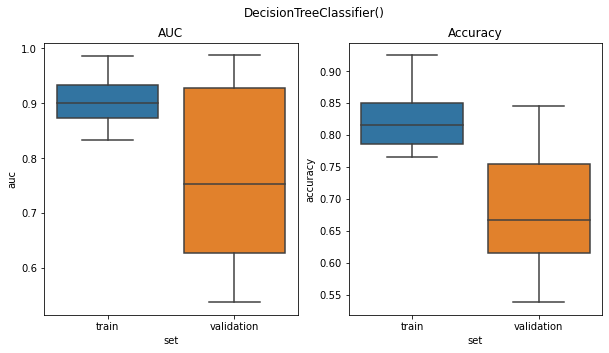

In [58]:
start = time()
results = []
for train_index, validation_index, in cv_10fold.split(X_train, Y_train):
    
    X_train_CV = X_train[train_index]
    Y_train_CV = Y_train[train_index]

    X_validation_CV = X_train[validation_index]
    Y_validation_CV = Y_train[validation_index]
    
    clf = clf_list[1]
    parameters = parameters_list[1]
    randomized_search = RandomizedSearchCV(clf, parameters, cv=cv_5fold, scoring='accuracy', n_iter = 10)
    randomized_search.fit(X_train_CV, Y_train_CV)
    
    # Get resulting classifier
    clf = randomized_search.best_estimator_

    # Test the classifier on the train data
    accuracy = clf.score(X_train_CV,Y_train_CV)
    probabilities = clf.predict_proba(X_train_CV)
    scores = probabilities[:, 1]
    
    # Get the auc
    auc = metrics.roc_auc_score(Y_train_CV, scores)
    results.append({
        'auc': auc,
        'accuracy': accuracy,
        'criterion': clf.criterion,
        'min_samples_split': clf.min_samples_split,
        'max_features': clf.max_features,
        "min_samples_leaf": clf.min_samples_leaf,
        'set': 'train'
    })
    
    # Test the classifier on the validation data
    accuracy_validation = clf.score(X_validation_CV,Y_validation_CV)
    probabilities_validation = clf.predict_proba(X_validation_CV)
    scores_validation = probabilities_validation[:, 1]
    
    # Get the auc
    auc_validation = metrics.roc_auc_score(Y_validation_CV, scores_validation)
    results.append({
        'auc': auc_validation,
        'accuracy': accuracy_validation,
        'criterion': clf.criterion,
        'min_samples_split': clf.min_samples_split,
        'max_features': clf.max_features,
        "min_samples_leaf": clf.min_samples_leaf,
        'set': 'validation'
    })
    
z = round((time() - start),2)
print(f"Decision tree classifier takes {z} seconds")
results_dt = results_plot(results,1)

# Logistic Regression

Logistic Regression classifier takes 1.94 seconds
The optimal solver = newton-cg
The optimal penalty = none
The optimal C = 1.0
Mean accuracy: train = 84.8%, validation = 82.6% 
Mean AUC: train = 0.925, validation = 0.921 


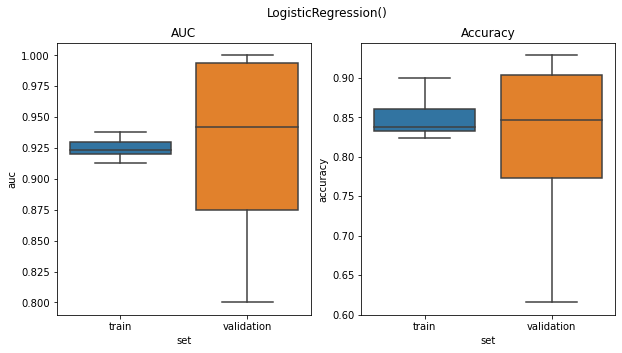

In [59]:
start = time()
results = []
for train_index, validation_index, in cv_10fold.split(X_train, Y_train):
    
    X_train_CV = X_train[train_index]
    Y_train_CV = Y_train[train_index]

    X_validation_CV = X_train[validation_index]
    Y_validation_CV = Y_train[validation_index]
    
    clf = clf_list[2]
    parameters = parameters_list[2]
    randomized_search = RandomizedSearchCV(clf, parameters, cv=cv_5fold, scoring='accuracy', n_iter = 10)
    randomized_search.fit(X_train_CV, Y_train_CV)
    
    # Get resulting classifier
    clf = randomized_search.best_estimator_

    # Test the classifier on the train data
    accuracy = clf.score(X_train_CV,Y_train_CV)
    probabilities = clf.predict_proba(X_train_CV)
    scores = probabilities[:, 1]
    auc = metrics.roc_auc_score(Y_train_CV, scores)
    
    results.append({
        'auc': auc,
        'accuracy': accuracy,
        'solver' : clf.solver,
        'penalty' : clf.penalty,
        'C' : clf.C,
        'set': 'train',
    })
    
    # Test the classifier on the validation data
    accuracy_validation = clf.score(X_validation_CV,Y_validation_CV)
    probabilities_validation = clf.predict_proba(X_validation_CV)
    scores_validation = probabilities_validation[:, 1]
    auc_validation = metrics.roc_auc_score(Y_validation_CV, scores_validation)
    
    results.append({
        'auc': auc_validation,
        'accuracy': accuracy_validation,
        'solver' : clf.solver,
        'C' : clf.C,
        'penalty' : clf.penalty,
        'set': 'validation'
    })
    
z = round((time() - start),2)
print(f"Logistic Regression classifier takes {z} seconds")
results_lr = results_plot(results,2)

# Random Forest

Random Forst classifier takes 32.02 seconds
The optimal n_estimators = 53
The optimal criterion = entropy
The optimal min_samples_split = 25
The optimal max_features = 4
The optimal min_samples_leaf = 17
Mean accuracy: train = 82.3%, validation = 68.4% 
Mean AUC: train = 0.903, validation = 0.764 


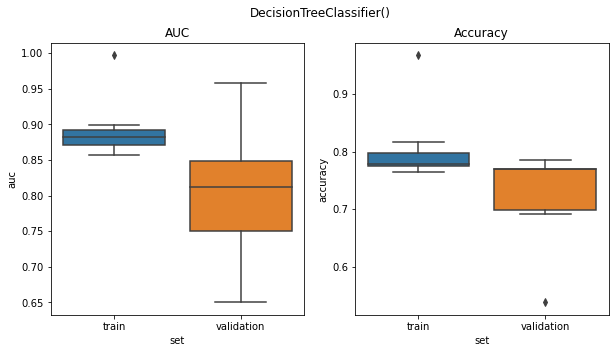

In [60]:
start = time()
results = []
for train_index, validation_index, in cv_10fold.split(X_train, Y_train):
    
    X_train_CV = X_train[train_index]
    Y_train_CV = Y_train[train_index]

    X_validation_CV = X_train[validation_index]
    Y_validation_CV = Y_train[validation_index]
    
    clf = clf_list[3]
    parameters = parameters_list[3]
    randomized_search = RandomizedSearchCV(clf, parameters, cv=cv_5fold, scoring='accuracy', n_iter = 10)
    randomized_search.fit(X_train_CV, Y_train_CV)
    
    # Get resulting classifier
    clf = randomized_search.best_estimator_

    # Test the classifier on the train data
    accuracy = clf.score(X_train_CV,Y_train_CV)
    probabilities = clf.predict_proba(X_train_CV)
    scores = probabilities[:, 1]
    auc = metrics.roc_auc_score(Y_train_CV, scores)

    results.append({
        'auc': auc,
        'accuracy': accuracy,
        "criterion": clf.criterion,
        "min_samples_split": clf.min_samples_split,
        "max_features": clf.max_features,
        "min_samples_leaf": clf.min_samples_leaf,
        "n_estimators" : clf.n_estimators,
        'set': 'train'
    })
    
    # Test the classifier on the validation data
    accuracy_validation = clf.score(X_validation_CV,Y_validation_CV)
    probabilities_validation = clf.predict_proba(X_validation_CV)
    scores_validation = probabilities_validation[:, 1]
    auc_validation = metrics.roc_auc_score(Y_validation_CV, scores_validation)
    
    results.append({
        'auc': auc_validation,
        'accuracy': accuracy_validation,
        "criterion": clf.criterion,
        "min_samples_split": clf.min_samples_split,
        "max_features": clf.max_features,
        "min_samples_leaf": clf.min_samples_leaf,
        "n_estimators" : clf.n_estimators,
        'set': 'validation'

    })

z = round((time() - start),2)
print(f"Random Forst classifier takes {z} seconds")
results_rf = results_plot(results,1)

# SVM

The optimal degree = 3
The optimal coef0 = 1.0
The optimal C = 100
The optimal kernel = poly
Mean accuracy: train = 79.1%, validation = 74.5% 
Mean AUC: train = 0.922, validation = 0.793 


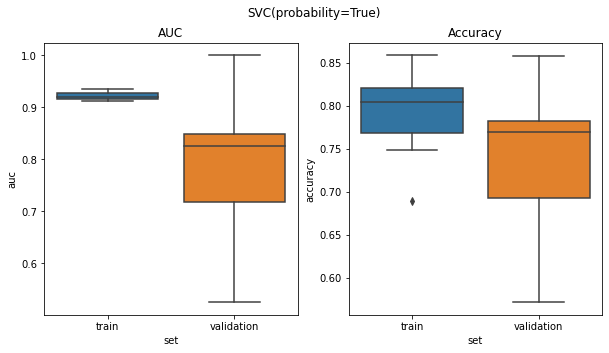

In [61]:
start = time()
results = []
for train_index, validation_index, in cv_10fold.split(X_train, Y_train):
    
    X_train_CV = X_train[train_index]
    Y_train_CV = Y_train[train_index]

    X_validation_CV = X_train[validation_index]
    Y_validation_CV = Y_train[validation_index]
    
    clf = clf_list[4]
    parameters = parameters_list[4]
    randomized_search = RandomizedSearchCV(clf, parameters, cv=cv_5fold, scoring='accuracy', n_iter = 10)
    randomized_search.fit(X_train_CV, Y_train_CV)
    
    # Get resulting classifier
    clf = randomized_search.best_estimator_

    # Test the classifier on the train data
    accuracy = clf.score(X_train_CV,Y_train_CV)
    probabilities = clf.predict_proba(X_train_CV)
    scores = probabilities[:, 1]
    auc = metrics.roc_auc_score(Y_train_CV, scores)
    
    results.append({
        'auc': auc,
        'accuracy': accuracy,
        'degree': clf.degree,
        'coef0': clf.coef0,
        'C': clf.C,
        'kernel': clf.kernel,
        'set': 'train'
    })
    
    # Test the classifier on the validation data
    accuracy_validation = clf.score(X_validation_CV,Y_validation_CV)
    probabilities_validation = clf.predict_proba(X_validation_CV)
    scores_validation = probabilities_validation[:, 1]
    auc_validation = metrics.roc_auc_score(Y_validation_CV, scores_validation)

    results.append({
        'auc': auc_validation,
        'accuracy': accuracy_validation,
        'degree': clf.degree,
        'coef0': clf.coef0,
        'C': clf.C,
        'kernel': clf.kernel,
        'set': 'validation'
    })
    
results_svm= results_plot(results,4)


In [ ]:
df_CV = pd.DataFrame(results_mean, index = clf_list)
df_CV.insert(2,'Difference accuracy', df_CV['Accuracy of train [%]']- df_CV['Accuracy of validation [%]'])
df_CV.insert(5,'Difference AUC', df_CV['AUC of train']- df_CV['AUC of validation'])
df_CV

# Test

In [64]:
results_test = []
for k in range(0,len(clf_list)):
    clf = clf_list[k]
    parameters = parameters_list[k]
    randomized_search = RandomizedSearchCV(clf, parameters, cv=cv_5fold, scoring='accuracy', n_iter = 10)
    randomized_search.fit(X_train, Y_train)
        
    clf = randomized_search.best_estimator_
    accuracy = clf.score(X_train,Y_train)
    probabilities = clf.predict_proba(X_train)
    scores = probabilities[:, 1]
    auc = metrics.roc_auc_score(Y_train, scores)

    accuracy_test = clf.score(X_test,Y_test)
    probabilities_test = clf.predict_proba(X_test)
    scores_test = probabilities_test[:, 1]
    auc_test = metrics.roc_auc_score(Y_test, scores_test)
    
   
    if k == 0:
            results_test.append({

                'accuracy training': round(accuracy,3)*100,
                'accuracy test': round(accuracy_test,3)*100,
                'AUC training': round(auc,3),
                'AUC test': round(auc_test,3),
            })

            parameters_knn = {
                'n_neighbors': clf.n_neighbors,
                "weights": clf.weights,
                "metric": clf.metric
            }
    elif k == 1:
            results_test.append({

                'accuracy training': round(accuracy,3)*100,
                'accuracy test': round(accuracy_test,3)*100,
                'AUC training': round(auc,3),
                'AUC test': round(auc_test,3),
            })

            parameters_dt = {
                'criterion': clf.criterion,
                'min_samples_split': clf.min_samples_split,
                'max_features': clf.max_features,
                "min_samples_leaf": clf.min_samples_leaf,
            }
    elif k == 2:
            results_test.append({
                'accuracy training': round(accuracy,3)*100,
                'accuracy test': round(accuracy_test,3)*100,
                'AUC training': round(auc,3),
                'AUC test': round(auc_test,3),
            })

            parameters_lr = {
                'solver' : clf.solver,
                'penalty' : clf.penalty,
                'C' : clf.C,
            }
    elif k == 3:
            results_test.append({

                'accuracy training': round(accuracy,3)*100,
                'accuracy test': round(accuracy_test,3)*100,
                'AUC training': round(auc,3),
                'AUC test': round(auc_test,3),
            })

            parameters_rf = {
                "criterion": clf.criterion,
                "min_samples_split": clf.min_samples_split,
                "max_features": clf.max_features,
                "min_samples_leaf": clf.min_samples_leaf,
                "n_estimators" : clf.n_estimators,
            }

    else:
            results_test.append({

                'accuracy training': round(accuracy,3)*100,
                'accuracy test': round(accuracy_test,3)*100,
                'AUC training': round(auc,3),
                'AUC test': round(auc_test,3),
            })

            parameters_svm = {
                'degree': clf.degree,
                'coef0': clf.coef0,
                'C': clf.C,
                'kernel': clf.kernel,
            }       


In [65]:
df_split = pd.DataFrame(results_test, index= clf_list)
df_split.insert(2,'Difference accuracy', df_split['accuracy training']- df_split['accuracy test'])
df_split.insert(5,'Difference AUC', df_split['AUC training']- df_split['AUC test'])
df_split

,accuracy training,accuracy test,Difference accuracy,AUC training,AUC test,Difference AUC
KNeighborsClassifier(),72.2,67.6,4.6,0.810,0.661,0.149
DecisionTreeClassifier(),87.2,70.6,16.6,0.957,0.685,0.272
LogisticRegression(),85.0,70.6,14.4,0.925,0.802,0.123
RandomForestClassifier(),75.2,73.5,1.7,0.870,0.681,0.189
SVC(probability=True),82.0,73.5,8.5,0.926,0.736,0.190
